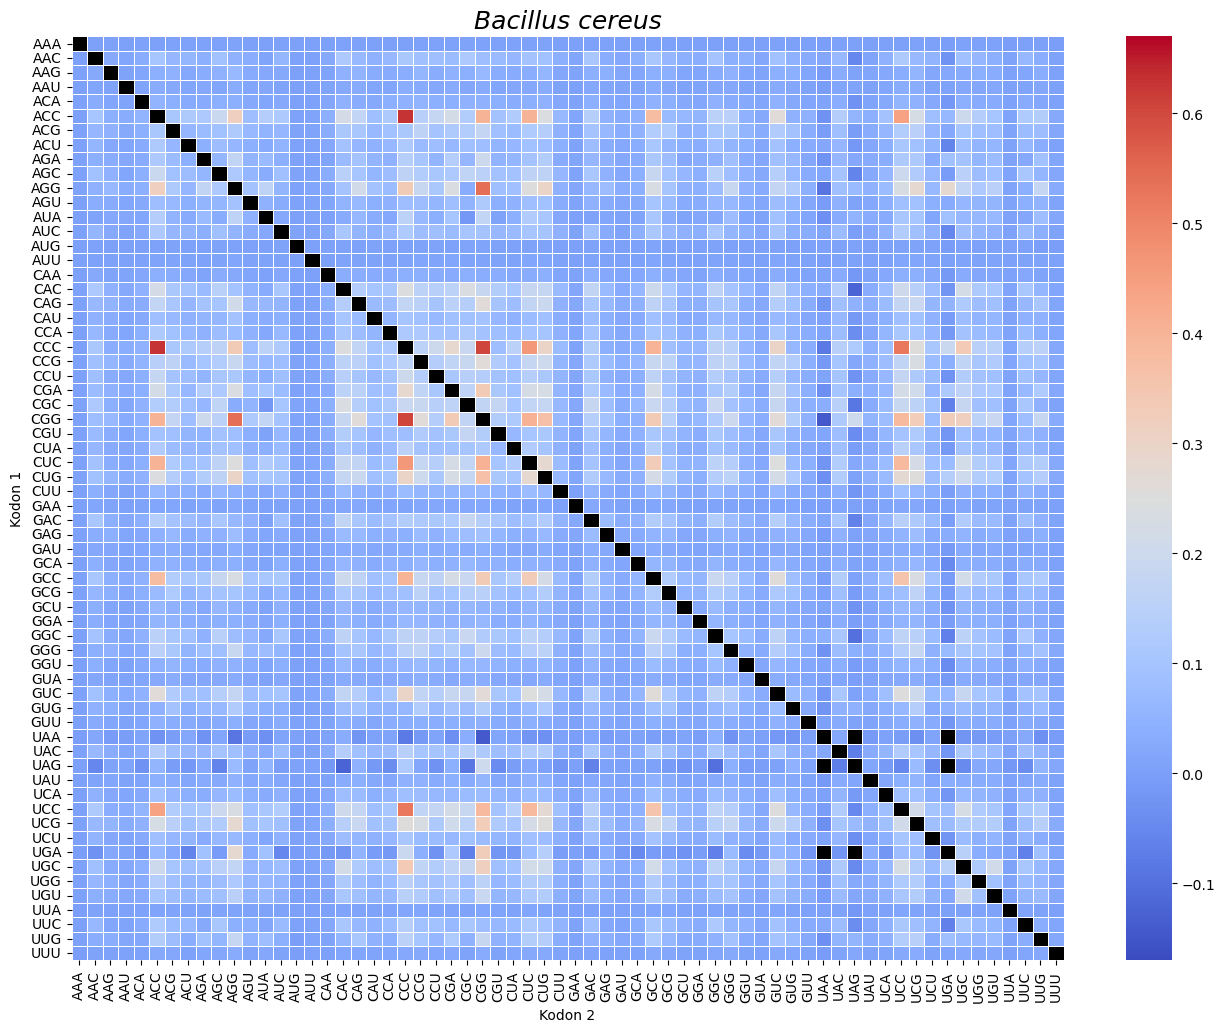

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import defaultdict

file_path = 'C:/Users/seq/bacillus_cereus.xlsx'
file_path_to_save = 'C:/Users/Kasia/OneDrive/Pulpit/bacillus_cereus_processed.xlsx'
data = pd.read_excel(file_path, sheet_name='cereus', header=None)

codon1 = data.iloc[:, 0]
codon2 = data.iloc[:, 1]
codon_cooccurrence = data.iloc[:, 2]

res_table = defaultdict(lambda: defaultdict(float))

for i in range(1, len(codon1)):
    res_table[codon1[i]][codon2[i]] = codon_cooccurrence[i]
    res_table[codon2[i]][codon1[i]] = codon_cooccurrence[i]

codons = []

for codon in res_table:
    codons.append(codon)

codons = sorted(codons)

res_dataframe = {'': codons}

for codon1 in codons:
    res_dataframe[codon1] = [res_table[codon1][codon2] for codon2 in codons]

res_dataframe = pd.DataFrame(res_dataframe)
res_dataframe = res_dataframe[[''] + codons]

plt.figure(figsize=(16, 12))
cmap = mpl.cm.get_cmap('coolwarm').copy()
cmap.set_bad('black')
species_name = 'Bacillus cereus'
title = species_name
sns.heatmap(res_dataframe.set_index(''), cmap=cmap, annot=False,linewidths=0.5, linecolor='white', mask=res_dataframe.set_index('') == 0, vmin=-0.17, vmax=0.67)
plt.title(title, fontstyle='italic', fontsize=18, y=1)

plt.xlabel('Kodon 2')
plt.ylabel('Kodon 1')
plt.show()

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

res_dataframe.to_excel(file_path_to_save, index=False)

In [13]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/seq/bacillus_cereus.xlsx'

data = pd.read_excel(file_path, sheet_name='cereus (1)', header=None)

data = data.iloc[1:, 1:]

codon_matrix = data.to_numpy()

print("Macierz współwystępowania kodonów:")
print(codon_matrix)

Macierz współwystępowania kodonów:
[['TAA' 0.999181131698665 '0']
 ['TTT' 1.00052589778783 '0']
 ['ATG' 1.00068901735197 '0']
 ...
 ['GCC' 1.02374027709881 '0']
 ['CTG' 1.02422158183973 '0']
 ['TCC' 1.0242631432077 '0']]
